# Deep Learning for Image Classification


#TODO  test  ----- preproccesing stage ( image generator)
# more pictues 

In [2]:
import tensorflow as tf
import os

2. Remove dodgy images

In [3]:
import cv2
import imghdr

In [4]:
data_dir = 'data' # Path to the data directory

In [5]:
image_exts = ['jpeg','jpg', 'bmp', 'png'] # Image extensions

In [6]:

data_dir = 'data'  # Replace with your data directory path

for image_class in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, image_class)
    if os.path.isdir(class_dir):  # Check if it's a directory
        for image in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image)
            try:
                # Your processing code here
                pass
            except Exception as e:
                print(f"Error processing {image_path}: {e}")


In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
data = tf.keras.utils.image_dataset_from_directory('data') # Replace with your data directory path

Found 307 files belonging to 2 classes.


In [9]:
data_iterator = data.as_numpy_iterator() # Create an iterator

In [10]:
batch = data_iterator.next() # Get the next batch of images and labels

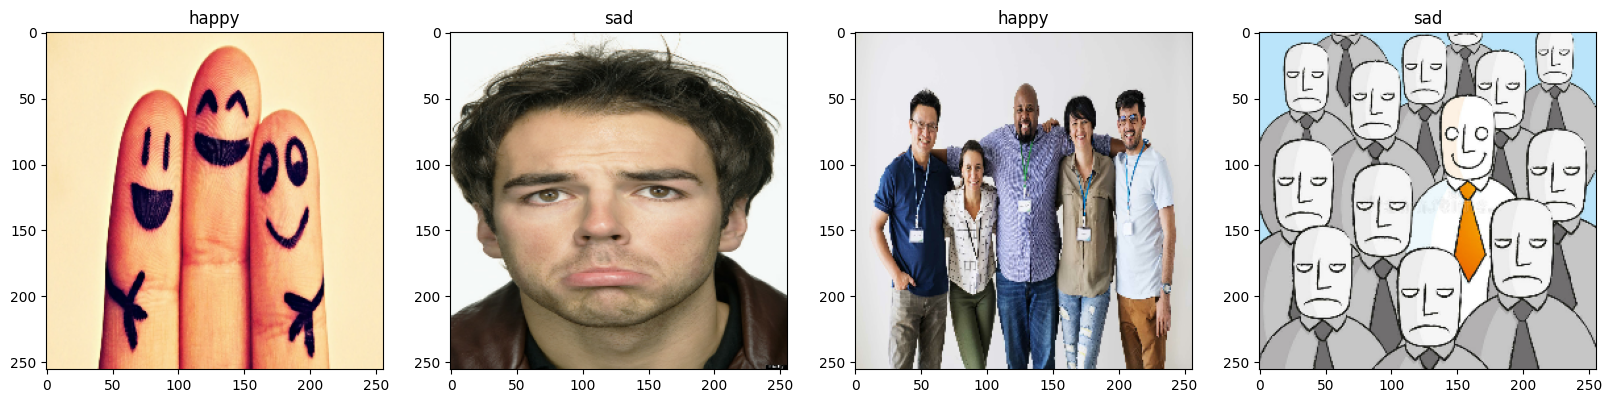

In [11]:
def map_label_to_name(label): # Create a mapping from label index to label name
    label_names = { 
        0: "happy", 
        1: "sad"
    }   
    return label_names.get(label, "unknown")    

fig, ax = plt.subplots(ncols=4, figsize=(20, 20)) # Create a figure containing 4 subplots


for idx, (img, label) in enumerate(zip(batch[0][:4], batch[1][:4])): # Iterate over the first 4 images and labels in batch
    ax[idx].imshow(img.astype(int)) # Convert to int to avoid normalization
    label_name = map_label_to_name(label)  # Convert label to its corresponding name
    ax[idx].set_title(label_name)  # Use set_title instead of title.set_text

plt.show() # Show the figure

4. Scale Data

In [12]:
data = data.map(lambda x,y: (x/255, y)) # Normalize the images

In [13]:
data.as_numpy_iterator().next() # Get the next batch of images and labels

(array([[[[0.58431375, 0.5137255 , 0.35686275],
          [0.58465075, 0.5140625 , 0.35719976],
          [0.5861826 , 0.51559436, 0.35873163],
          ...,
          [0.7882353 , 0.77254903, 0.7607843 ],
          [0.7882353 , 0.77254903, 0.7607843 ],
          [0.7882353 , 0.77254903, 0.7607843 ]],
 
         [[0.58465075, 0.5140625 , 0.35719976],
          [0.5849588 , 0.51437056, 0.3575078 ],
          [0.586359  , 0.5157708 , 0.35890803],
          ...,
          [0.7865344 , 0.77084816, 0.75908345],
          [0.78627115, 0.7705849 , 0.7588202 ],
          [0.7862132 , 0.77052695, 0.75876224]],
 
         [[0.5861826 , 0.51559436, 0.35873163],
          [0.586359  , 0.5157708 , 0.35890803],
          [0.5871608 , 0.5165726 , 0.35970986],
          ...,
          [0.77880335, 0.7631171 , 0.75135237],
          [0.7773433 , 0.761657  , 0.7498923 ],
          [0.77702206, 0.7613358 , 0.7495711 ]],
 
         ...,
 
         [[0.0606924 , 0.0606924 , 0.05284926],
          [0.06102

5. Split Data

In [14]:
train_size = int(len(data)*.7) # 70% of the data for training
val_size = int(len(data)*.2)    # 20% of the data for validation
test_size = int(len(data)*.1)   # 10% of the data for testing


In [15]:
print(f"Training data size: {train_size}")
print(f"Validation data size: {val_size}")
print(f"Testing data size: {test_size}")

Training data size: 7
Validation data size: 2
Testing data size: 1


In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [17]:
train


<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

6. Build Deep Learning Model

In [18]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential() # Create a sequential model

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3))) # Add a convolutional layer
model.add(MaxPooling2D()) # Add a pooling layer
model.add(Conv2D(32, (3,3), 1, activation='relu'))  # Add another convolutional layer
model.add(MaxPooling2D()) # Add another pooling layer
model.add(Conv2D(16, (3,3), 1, activation='relu')) # Add another convolutional layer
model.add(MaxPooling2D()) # Add another pooling layer
model.add(Flatten()) # Flatten the output of the convolutional layers
model.add(Dense(256, activation='relu')) # Add a dense layer
model.add(Dense(1, activation='sigmoid')) # Add an output layer

In [22]:
# Compile the model with the Adam optimizer, binary cross-entropy loss and accuracy metric
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy']) 

In [23]:
model.summary() # Print the model summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

7. Train

In [24]:
logdir='logs' # Path to save the logs for Tensorboard

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir) # Create a Tensorboard callback

In [26]:
hist = model.fit(train, epochs=20, validation_data=val) # Train the model for 20 epochs

# save the model
model.save('model.h5')

Epoch 1/20


7/7 [==============================] - 5s 487ms/step - loss: 0.9290 - accuracy: 0.4732 - val_loss: 0.6564 - val_accuracy: 0.5312
Epoch 2/20
7/7 [==============================] - 4s 479ms/step - loss: 0.6398 - accuracy: 0.6027 - val_loss: 0.6017 - val_accuracy: 0.8594
Epoch 3/20
7/7 [==============================] - 4s 486ms/step - loss: 0.5573 - accuracy: 0.7277 - val_loss: 0.5398 - val_accuracy: 0.7188
Epoch 4/20
7/7 [==============================] - 5s 505ms/step - loss: 0.5178 - accuracy: 0.7277 - val_loss: 0.4552 - val_accuracy: 0.9062
Epoch 5/20
7/7 [==============================] - 4s 468ms/step - loss: 0.4319 - accuracy: 0.8170 - val_loss: 0.3037 - val_accuracy: 0.9062
Epoch 6/20
7/7 [==============================] - 4s 471ms/step - loss: 0.3205 - accuracy: 0.8929 - val_loss: 0.2809 - val_accuracy: 0.9062
Epoch 7/20
7/7 [==============================] - 4s 469ms/step - loss: 0.2269 - accuracy: 0.9375 - val_loss: 0.2199 - val_accuracy: 0.9219
Epoch 8/20
7/7 [===============

/Users/sobhione/miniforge3/envs/cv/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8. * Plot Performance

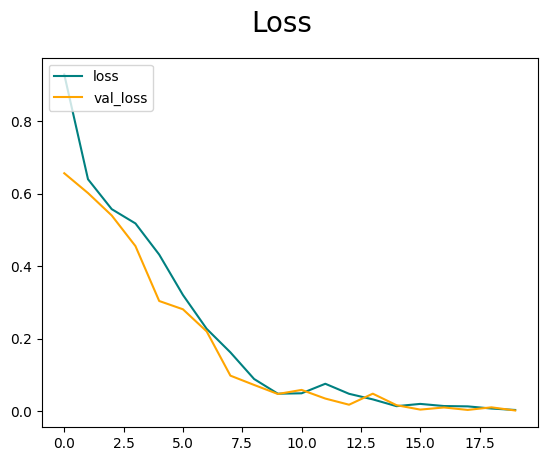

In [27]:
fig = plt.figure() # Create a figure
plt.plot(hist.history['loss'], color='teal', label='loss') # Plot the training loss in teal
plt.plot(hist.history['val_loss'], color='orange', label='val_loss') # Plot the validation loss in orange
fig.suptitle('Loss', fontsize=20) # Set the title for the figure
plt.legend(loc="upper left")    # Add a legend to the upper left corner
plt.show() # Show the figure

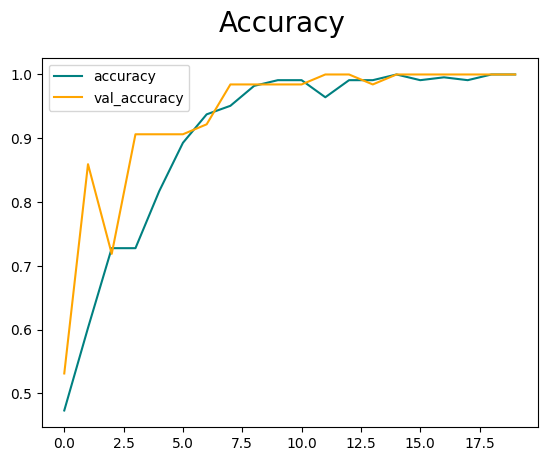

In [28]:
fig = plt.figure() # Create a figure
plt.plot(hist.history['accuracy'], color='teal', label='accuracy') # Plot the training accuracy in teal
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy') # Plot the validation accuracy in orange
fig.suptitle('Accuracy', fontsize=20) # Set the title for the figure
plt.legend(loc="upper left")    # Add a legend to the upper left corner
plt.show()  # Show the figure

9. Evaluate

In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [30]:
pre = Precision() # Create a precision metric
re = Recall()   # Create a recall metric
acc = BinaryAccuracy() # Create a binary accuracy metric

In [31]:
for batch in test.as_numpy_iterator():  # Iterate over the test data
    X, y = batch # Get the images and labels
    yhat = model.predict(X) # Get the predictions for the images
    pre.update_state(y, yhat) # Update the precision metric
    re.update_state(y, yhat)  # Update the recall metric
    acc.update_state(y, yhat) # Update the accuracy metric

1/1 [==============================] - 0s 95ms/step


In [32]:
print(pre.result(), re.result(), acc.result()) # Print the final values of the metrics 

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


10. Test

In [34]:
from bing_image_downloader import downloader

downloader.download("human_happy_face", limit=1,  output_dir='data_untrained/happy', adult_filter_off=True, force_replace=False, timeout=60)
downloader.download("human_sad_face", limit=1,  output_dir='data_untrained/sad', adult_filter_off=True, force_replace=False, timeout=60)




[%] Downloading Images to /Users/sobhione/Documents/JENSENS-SCHOOL/Deep_Learning/Project/data_untrained/happy/human_happy_face


[!!]Indexing page: 1

[%] Indexed 1 Images on Page 1.


[%] Downloading Image #1 from https://images.fineartamerica.com/images-medium-large-5/smiling-face-mark-thomasscience-photo-library.jpg
[%] File Downloaded !



[%] Done. Downloaded 1 images.
[%] Downloading Images to /Users/sobhione/Documents/JENSENS-SCHOOL/Deep_Learning/Project/data_untrained/sad/human_sad_face


[!!]Indexing page: 1

[%] Indexed 1 Images on Page 1.


[%] Downloading Image #1 from http://www.cbc.ca/natureofthings/content/images/blog/Universal_Expression_Sadness.jpg
[!] Issue getting: http://www.cbc.ca/natureofthings/content/images/blog/Universal_Expression_Sadness.jpg
[!] Error:: got more than 100 headers


[!!]Indexing page: 2

[%] Indexed 35 Images on Page 2.


[%] Downloading Image #1 from https://4.bp.blogspot.com/-yGUxPQUkp3o/VZNx82QBJBI/AAAAAAAACRk/nACR7B7gmMg/s1600/sad1.jpg
[%] 

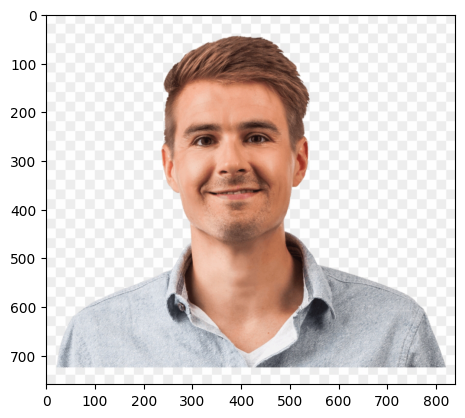

In [35]:
img = cv2.imread('data_untrained/happy/human_happy_face/Image_4.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

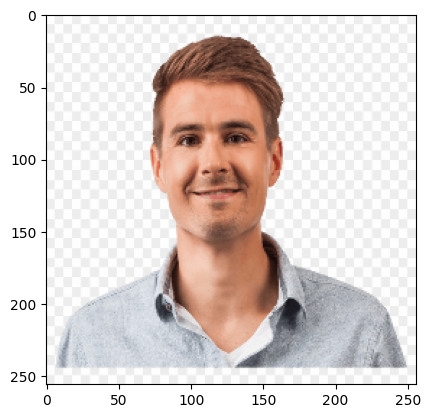

In [36]:
resize = tf.image.resize(img_rgb, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [37]:
# Predict the image
yhat = model.predict(resize.numpy().reshape(1,256,256,3))
print(f'Predicted label: {yhat}')



1/1 [==============================] - 0s 23ms/step
Predicted label: [[1.]]


In [38]:
# Display the predicted label

if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
